In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath1 = "Horizontal_Merge.csv"

df=pd.read_csv(filepath1)
df.head()

,Country,Happiness Rank_2015,Happiness Score_2015,Economy (GDP per Capita)_2015,Social Support_2015,Health Life Expectancy_2015,Freedom_2015,Generosity_2015,Trust (Government Corruption)_2015,Happiness Rank_2016,...,Trust (Government Corruption)_2019,Generosity_2019,Happiness Rank_2020,Happiness Score_2020,Economy (GDP per Capita)_2020,Social Support_2020,Health Life Expectancy_2020,Freedom_2020,Trust (Government Corruption)_2020,Generosity_2020
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.0,...,0.343,0.263,3.0,7.5599,10.979933,0.942847,74.102448,0.921337,0.303728,0.105911
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,3.0,...,0.118,0.354,4.0,7.5045,10.772559,0.974670,73.000000,0.948892,0.711710,0.246944
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,1.0,...,0.410,0.252,2.0,7.6456,10.774001,0.955991,72.402504,0.951444,0.168489,0.066202
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,4.0,...,0.341,0.271,5.0,7.4880,11.087804,0.952487,73.200783,0.955750,0.263218,0.134533
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,6.0,...,0.308,0.285,11.0,7.2321,10.692369,0.927177,73.601601,0.933913,0.390843,0.124771


In [3]:
cols=[x for x in df.columns if "Happiness Score" in x]
cols.append("Country")
print(cols)

['Happiness Score_2015', 'Happiness Score_2016', 'Happiness Score_2017', 'Happiness Score_2018', 'Happiness Score_2019', 'Happiness Score_2020', 'Country']


In [4]:
df_sub = df.loc[:,cols][0:5]
df_sub

,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Happiness Score_2020,Country
0,7.587,7.509,7.494,7.487,7.480,7.5599,Switzerland
1,7.561,7.501,7.504,7.495,7.494,7.5045,Iceland
2,7.527,7.526,7.522,7.555,7.600,7.6456,Denmark
3,7.522,7.498,7.537,7.594,7.554,7.4880,Norway
4,7.427,7.404,7.316,7.328,7.278,7.2321,Canada


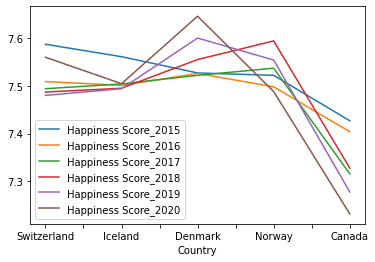

In [5]:
df_sub.set_index("Country").plot(kind="line")
# x year
# lines are countries

In [6]:
def make_country_plot(df, country):
    test = df.loc[df.Country == country]

    years = [2015, 2016, 2017, 2018, 2019,2020]
    happiness = test[["Happiness Score_2015", "Happiness Score_2016", "Happiness Score_2017", "Happiness Score_2018", "Happiness Score_2019", "Happiness Score_2020"]].values[0]
    economy= test[["Economy (GDP per Capita)_2015", "Economy (GDP per Capita)_2016", "Economy (GDP per Capita)_2017", "Economy (GDP per Capita)_2018", "Economy (GDP per Capita)_2019", "Economy (GDP per Capita)_2020"]].values[0]
    support = test[["Social Support_2015", "Social Support_2016", "Social Support_2017", "Social Support_2018", "Social Support_2019", "Social Support_2020"]].values[0]
    health = test[["Health Life Expectancy_2015", "Health Life Expectancy_2016", "Health Life Expectancy_2017", "Health Life Expectancy_2018", "Health Life Expectancy_2019", "Health Life Expectancy_2020"]].values[0]
    freedom = test[["Freedom_2015", "Freedom_2016", "Freedom_2017", "Freedom_2018", "Freedom_2019", "Freedom_2020"]].values[0]
    trust = test[["Trust (Government Corruption)_2015", "Trust (Government Corruption)_2016", "Trust (Government Corruption)_2017", "Trust (Government Corruption)_2018", "Trust (Government Corruption)_2019", "Trust (Government Corruption)_2020"]].values[0]
    generosity = test[["Generosity_2015", "Generosity_2016", "Generosity_2017", "Generosity_2018", "Generosity_2019", "Generosity_2020"]].values[0]

    #figsize
    plt.figure(figsize=(10,10))

    plt.plot(years, happiness, linewidth=3, label="Happiness Score")
    plt.plot(years, economy, linewidth=3, label="Economy")
    plt.plot(years, support, linewidth=3, label="Social Support")
    plt.plot(years, health, linewidth=3, label="Health Life Expectancy")
    plt.plot(years, freedom, linewidth=3, label="Freedom")
    plt.plot(years, trust, linewidth=3, label="Trust")
    plt.plot(years, generosity, linewidth=3, label="Generosity")

    plt.legend()
    plt.grid(color="lightgrey", alpha=0.2)

    plt.ylim(0, 8)

    # Give our chart some labels and a tile
    plt.title(f"Happiness Outcomes for {country}", fontweight="bold", fontsize=18, fontname="Georgia")
    plt.xlabel("Country", fontsize=16, fontname="Georgia")
    plt.ylabel("Happiness", fontsize=16, fontname="Georgia")

    plt.show()

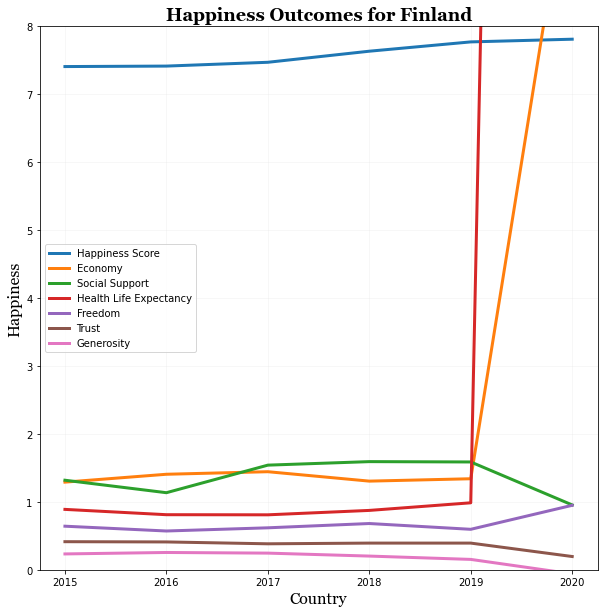

In [7]:
make_country_plot(df, "Finland")

In [8]:
df_sub.T

,0,1,2,3,4
Happiness Score_2015,7.587,7.561,7.527,7.522,7.427
Happiness Score_2016,7.509,7.501,7.526,7.498,7.404
Happiness Score_2017,7.494,7.504,7.522,7.537,7.316
Happiness Score_2018,7.487,7.495,7.555,7.594,7.328
Happiness Score_2019,7.48,7.494,7.6,7.554,7.278
Happiness Score_2020,7.5599,7.5045,7.6456,7.488,7.2321
Country,Switzerland,Iceland,Denmark,Norway,Canada
